In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
from matplotlib import patches
import seaborn as sns
from adjustText import adjust_text

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

In [81]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
from bootstrap import dG_bootstrap
import plotting

In [82]:
import parmed as pmd

# Load in results

In [3]:
bgbg = pd.read_csv("results/bgbg_tip3p_by_orientation.csv")
bgbg_combined = pd.read_csv("results/bgbg_tip3p_combined.csv")

bg2bg2 = pd.read_csv("results/bg2bg2_tip3p_by_orientation.csv")
bg2bg2_combined = pd.read_csv("results/bg2bg2_tip3p_combined.csv")

smirnoff = pd.read_csv("results/smirnoff_by_orientation.csv")
smirnoff_combined = pd.read_csv("results/smirnoff_combined.csv")

experimental = pd.read_csv("results/experimental.csv")

# Compare binding to alpha and beta

In [4]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
        
    line.axes.annotate('',
        xytext=(xdata[0], ydata[0]),
        xy=(xdata[1], ydata[1]),
        arrowprops=dict(arrowstyle="->", lw=3, color=color),
        size=size
    )

In [11]:
def scatter_by_cyclodextrin(df, x, y, xerr, yerr, xlabel, ylabel, name=None):
    fig, ax = plt.subplots(1, figsize=(6 * 1.0 * 1/0.85, 6))
    
    lines_to_draw = sum([len(df[df["Guest"] == i]) == 2 for i in df["Guest"].unique()])
    colors = sns.color_palette("husl", lines_to_draw)
    color_index = 0
    
    for index, guest in enumerate(sorted(df["Guest"].unique())):
        tmp = df[df["Guest"] == guest]
            
        if len(tmp) == 2:
            
            for row_index, row in tmp.iterrows():
                ax.errorbar(
                    row[x],
                    row[y],
                    fmt="o",
                    markersize=12,
                    markeredgecolor="k" if row["System"][0] == "a" else None,
                    markeredgewidth=1.5 if row["System"][0] == "a" else None,
                    elinewidth=1.0,
                    ecolor="0.5",
                    color=colors[color_index],
                    label=guest if row["System"][0] == "b" else None,
                )

            line = ax.plot(
                tmp[x],
                tmp[y],
                color = colors[color_index],
                lw=1,
                label="",
            )
            print(f"{tmp['System'].iloc[0]} ({tmp[x].iloc[0]:0.2f}, {tmp[y].iloc[0]:0.2f}) → {tmp['System'].iloc[1]} ({tmp[x].iloc[1]:0.2f}, {tmp[y].iloc[1]:0.2f})")
            # add_arrow(line[0])
            color_index += 1
        else:
            pass
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1, frameon=False)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.plot([-50, 50], [-50, 50], ls="-", c="0.3", zorder=-1, lw="0.5")
    ax.set_ylim(-8, 2)
    ax.set_xlim(-8, 2)
    
    if name:
        fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
        fig.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")

a-cbu (-2.02, -1.33) → b-cbu (-1.55, -1.88)
a-chp (-2.51, -2.38) → b-chp (-4.56, -3.08)
a-coc (-3.23, -1.78) → b-coc (-4.97, -3.28)
a-cpe (-2.13, -1.59) → b-cpe (-3.05, -3.57)
a-ham (-3.53, -3.43) → b-ham (-2.49, -2.52)
a-hep (-3.99, -3.95) → b-hep (-3.39, -3.41)
a-hex (-3.38, -2.70) → b-hex (-2.28, -2.93)
a-mha (-3.60, -3.60) → b-mha (-2.56, -3.46)
a-oam (-4.61, -4.68) → b-oam (-3.59, -3.35)
a-pnt (-2.60, -2.56) → b-pnt (-1.27, -2.22)


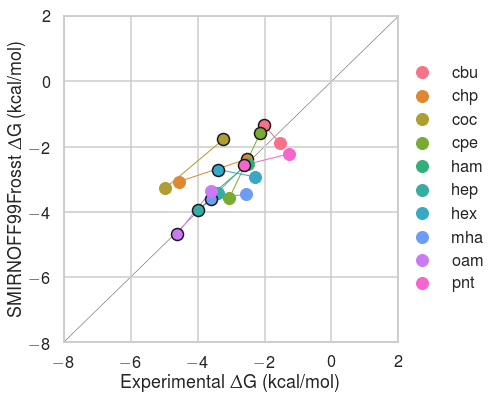

In [12]:
df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                                "_experiment"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]

scatter_by_cyclodextrin(df, 
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        )

a-cbu (-2.02, -0.89) → b-cbu (-1.55, -1.64)
a-chp (-2.51, -1.69) → b-chp (-4.56, -2.79)
a-coc (-3.23, -1.86) → b-coc (-4.97, -3.36)
a-cpe (-2.13, -1.50) → b-cpe (-3.05, -3.55)
a-ham (-3.53, -3.02) → b-ham (-2.49, -2.01)
a-hep (-3.99, -3.92) → b-hep (-3.39, -3.34)
a-hex (-3.38, -2.92) → b-hex (-2.28, -2.47)
a-mha (-3.60, -2.89) → b-mha (-2.56, -2.14)
a-oam (-4.61, -4.33) → b-oam (-3.59, -2.60)
a-pnt (-2.60, -1.74) → b-pnt (-1.27, -1.74)


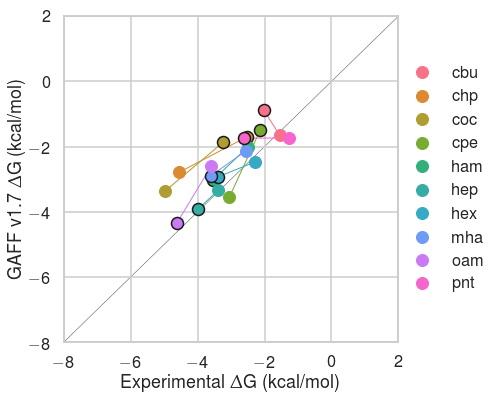

In [13]:
df = bgbg_combined.merge(experimental, on=["System"], suffixes=("_bgbg_tip3p",
                                                                "_experiment"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]

scatter_by_cyclodextrin(df, 
        x="Delta G_experiment",
        y="Delta G_bgbg_tip3p",
        xerr="G_SEM_experiment",
        yerr="G_SEM_bgbg_tip3p",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        name="GAFF-v1.7-vs-Experiment-dG-by-cyclodextrin"
        )

a-cbu (-2.02, -3.73) → b-cbu (-1.55, -2.77)
a-chp (-2.51, -4.11) → b-chp (-4.56, -6.27)
a-coc (-3.23, -3.35) → b-coc (-4.97, -7.13)
a-cpe (-2.13, -3.79) → b-cpe (-3.05, -5.93)
a-ham (-3.53, -5.99) → b-ham (-2.49, -4.14)
a-hep (-3.99, -6.23) → b-hep (-3.39, -4.15)
a-hex (-3.38, -5.27) → b-hex (-2.28, -3.59)
a-mha (-3.60, -5.55) → b-mha (-2.56, -4.66)
a-oam (-4.61, -6.99) → b-oam (-3.59, -5.24)
a-pnt (-2.60, -4.14) → b-pnt (-1.27, -2.00)


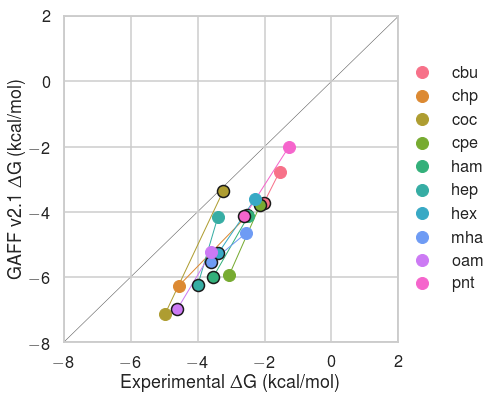

In [14]:
df = bg2bg2_combined.merge(experimental, on=["System"], suffixes=("_bg2bg2_tip3p",
                                                                "_experiment"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]

scatter_by_cyclodextrin(df, 
        x="Delta G_experiment",
        y="Delta G_bg2bg2_tip3p",
        xerr="G_SEM_experiment",
        yerr="G_SEM_bg2bg2_tip3p",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        name="GAFF-v2.1-vs-Experiment-dG-by-cyclodextrin"
        )

a-cbu (-2.02, -1.33) → b-cbu (-1.55, -1.88)
a-chp (-2.51, -2.38) → b-chp (-4.56, -3.08)
a-coc (-3.23, -1.78) → b-coc (-4.97, -3.28)
a-cpe (-2.13, -1.59) → b-cpe (-3.05, -3.57)
a-ham (-3.53, -3.43) → b-ham (-2.49, -2.52)
a-hep (-3.99, -3.95) → b-hep (-3.39, -3.41)
a-hex (-3.38, -2.70) → b-hex (-2.28, -2.93)
a-mha (-3.60, -3.60) → b-mha (-2.56, -3.46)
a-oam (-4.61, -4.68) → b-oam (-3.59, -3.35)
a-pnt (-2.60, -2.56) → b-pnt (-1.27, -2.22)


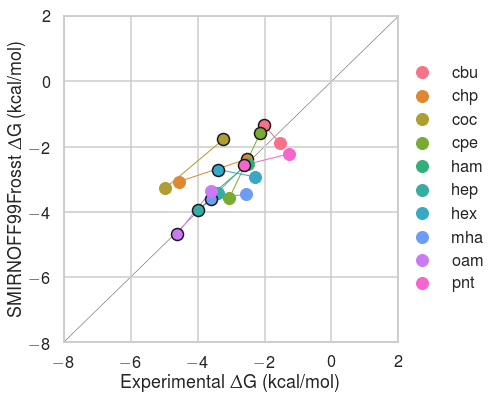

In [15]:
df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                                "_experiment"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]

scatter_by_cyclodextrin(df, 
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-by-cyclodextrin"
        )

# Compare by guest orientation

In [20]:
def scatter_by_orientation(df, x, y, xerr, yerr, xlabel, ylabel, name=None):
    
    fig, ax = plt.subplots(1, figsize=(6 * 1.0 * 1/0.85, 6))

    colors = sns.color_palette("husl", 3)
    color_index = 0

    colors = sns.color_palette("husl", len(df["Short"].unique()))
    for index, sys in enumerate(df["Short"].unique()):
        tmp = df[df["Short"] == sys]

        x_difference = abs(tmp[x].iloc[1] - tmp[x].iloc[0])
        y_difference = abs(tmp[y].iloc[1] - tmp[y].iloc[0])

        if x_difference > 2 or y_difference > 2:

            ax.errorbar(
                tmp[x],
                tmp[y],
                fmt="o",
                markersize=12,
                markeredgecolor="k",
                markeredgewidth=0.2,
                elinewidth=1.0,
                ecolor="0.5",
                color = colors[index],
                label=sys
            )

            line = ax.plot(
                tmp[x],
                tmp[y],
                color = colors[index],
                label="",
            )
                        
            add_arrow(line[0])
            print(f"{tmp['System'].iloc[0]} ({tmp[x].iloc[0]:0.2f}, {tmp[y].iloc[0]:0.2f}) → {tmp['System'].iloc[1]} ({tmp[x].iloc[1]:0.2f}, {tmp[y].iloc[1]:0.2f})")        
        else:
            ax.errorbar(
                tmp[x],
                tmp[y],
                fmt="o",
                markersize=8,
                markeredgecolor="k",
                markeredgewidth=0.2,
                elinewidth=1.0,
                ecolor="0.5",
                color = "0.7",
                label="",
                zorder=1,
            )


    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])
    ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), ncol=1, frameon=False)

    ax.plot([-50, 50], [-50, 50], ls="-", c="0.3", zorder=-1, lw="0.5")
    ax.set_ylim(-8, 2)
    ax.set_xlim(-8, 2)

    if name:
        fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
        fig.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")


a-bam-p (-0.02, -3.24) → a-bam-s (-0.62, -0.54)
a-coc-p (0.34, 0.47) → a-coc-s (-1.84, -1.76)
a-pam-p (-1.06, -2.62) → a-pam-s (-1.11, -0.29)


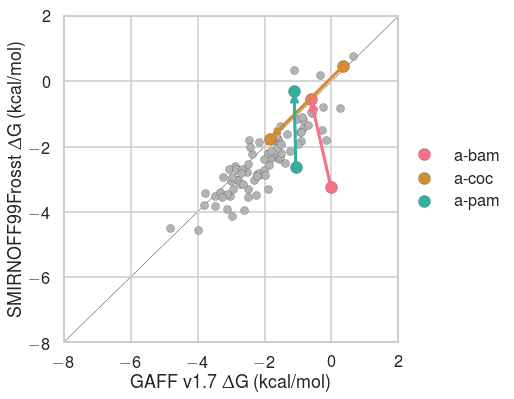

In [21]:
df = smirnoff.merge(bgbg, on=["System"], suffixes=("_smirnoff",
                                                         "_bgbg_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

scatter_by_orientation(df, 
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-by-orientation-highlight"
        )

a-bam-p (0.15, -3.24) → a-bam-s (-2.93, -0.54)
a-chp-p (0.54, -0.82) → a-chp-s (-4.11, -2.32)
a-cpe-p (-0.12, 0.34) → a-cpe-s (-3.79, -1.56)
a-coc-p (1.10, 0.47) → a-coc-s (-3.35, -1.76)
a-mba-p (0.18, 0.76) → a-mba-s (-3.17, -1.19)
a-pam-p (-2.13, -2.62) → a-pam-s (-3.97, -0.29)


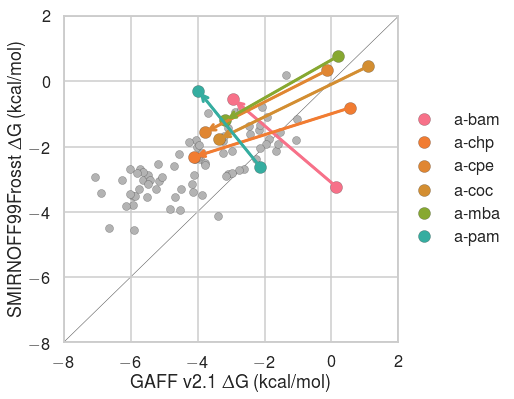

In [22]:
df = smirnoff.merge(bg2bg2, on=["System"], suffixes=("_smirnoff",
                                                         "_bg2bg2_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

scatter_by_orientation(df, 
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-by-orientation-highlight"
        )

# Highlight subsets

In [403]:
def scatter_with_highlight(df, x, y, xerr, yerr, xlabel, ylabel, highlight, palette="husl", name=None):
    
    fig, ax = plt.subplots(1, figsize=(6 * 1.0, 6 * 1.0 / 0.85))

    color_index = 0
    texts = []
    my_patches = []    
    
    
    heavy_atoms = dict()
    for sys in highlight:
        try:
            structure = pmd.load_file(f"systems/{sys}-p/smirnoff/hg.prmtop")
        except:
            structure = pmd.load_file(f"systems/{sys}/smirnoff/hg.prmtop")
        guest_residue = sys.split("-")[1]
        guest = structure[f":{guest_residue.upper()}&!@H="]
        heavy_atoms[sys] = len(guest.atoms)
        
    colors = sns.color_palette(palette, len(set(heavy_atoms.values())))
    atom_count = np.sort(np.unique(np.fromiter(heavy_atoms.values(), 
                                               dtype=float)))
    
    for sys in highlight:
        
        color_index = np.where(atom_count == heavy_atoms[sys])[0][0] 
        
        tmp = df[df["System"] == sys]
        ax.errorbar(
        tmp[x],
        tmp[y],
        fmt="o",
        markersize=12,
        markeredgecolor="k",
        markeredgewidth=0.2,
        elinewidth=1.0,
        ecolor="0.5",
        color = colors[color_index],
        zorder=20,
        label="",
        )
        for i, j in zip(tmp[x].values, tmp[y].values):
            texts.append(ax.text(i, j, sys, size=18,
                              color = colors[color_index], 
                              bbox=dict(facecolor="w", alpha=0.8, edgecolor="0.5", lw="0.5")))
            my_patches.append(patches.Circle((i, j), 
                       radius=0.11,
                       facecolor=None,
                       edgecolor=None,
                       alpha=0))
            
    
    for index, sys in enumerate(df["System"].unique()):
        tmp = df[df["System"] == sys]
        ax.errorbar(
            tmp[x],
            tmp[y],
            fmt="o",
            markersize=8,
            markeredgecolor="k",
            markeredgewidth=0.2,
            elinewidth=1.0,
            ecolor="0.5",
            color = "0.7",
            label="",
            zorder=1,
        )
            
    for p in my_patches:
            ax.add_patch(p)
    

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    ax.plot([-50, 50], [-50, 50], ls="-", c="0.3", zorder=-1, lw="0.5")
    ax.set_ylim(-10, 4)
    ax.set_xlim(-10, 4)
    def set_ticks(ticks):
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        
    set_ticks(range(-10, 4, 2))

    adjust_text(texts,
               ax=ax,
               add_objects=my_patches,
               expand_points=(2, 2),
               expand_text=(1.2, 1.4),
               force_points=(1.2, 1.2),
               arrowprops=dict(arrowstyle='-', color="0.5", lw=1)
               )    
    
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color="w", label=int(atms),
                              markerfacecolor=clr, markersize=15)
                      for clr, atms in zip(colors, atom_count)]
    
    box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.85])
    ax.legend(handles=legend_elements,
              loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol = len(colors),
              frameon=True,
              title="Heavy atoms",
              borderpad=0.5,
              handlelength=0.5,
              columnspacing=0.5,
              labelspacing=0.5)
    
    if name:
        fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
        fig.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")



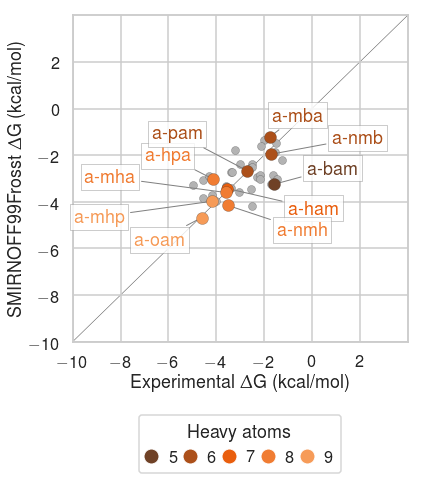

In [404]:
df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                                "_experiment"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]


scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["a-pam", "a-ham", "a-hpa", "a-oam"],
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "a")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-alpha-ammonium"
)

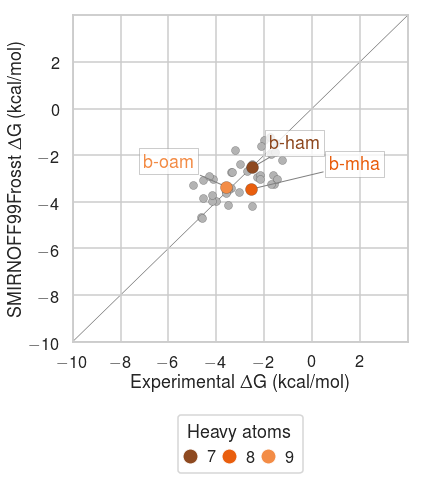

In [405]:
scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["b-pam", "b-ham", "b-hpa", "b-oam"],
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "b")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-beta-ammonium"
)

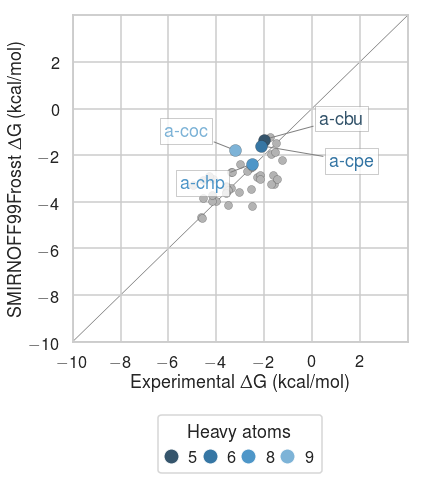

In [406]:
scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["a-cbu", "a-cpe", "a-chp", "a-coc"],
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "a")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-alpha-alcohols"
)

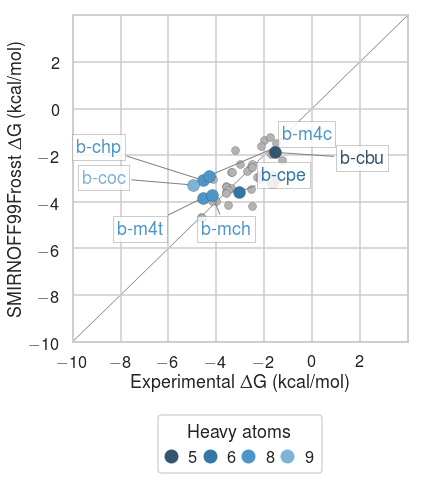

In [407]:
scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["b-cbu", "b-cpe", "b-chp", "b-coc"],
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "b")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-beta-alcohols"
)

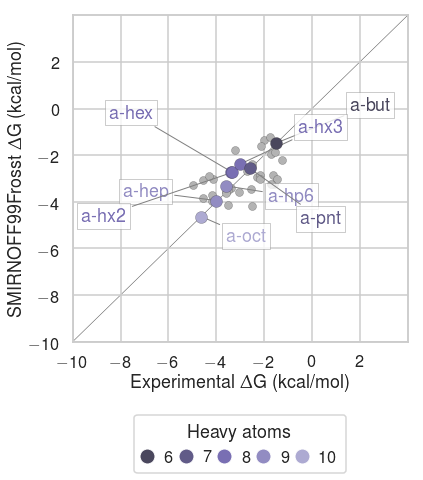

In [408]:
scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["a-but", "a-pnt", "a-hex", "a-hep", "a-oct"],
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "a")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-alpha-carboxylates"
)

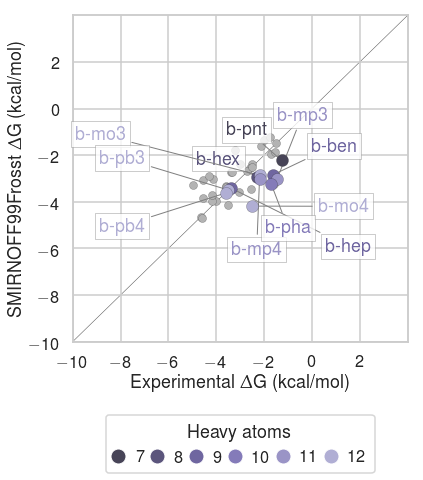

In [409]:
scatter_with_highlight(df,         
        x="Delta G_experiment",
        y="Delta G_smirnoff",
        xerr="G_SEM_experiment",
        yerr="G_SEM_smirnoff",
        xlabel=r"Experimental $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        # highlight=["b-but", "b-pnt", "b-hex", "b-hep", "b-oct"],
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "b")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-Experiment-dG-highlight-beta-carboxylates"
)

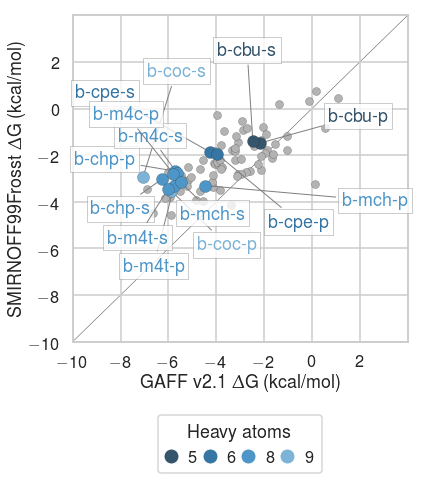

In [410]:
df = smirnoff.merge(bg2bg2, on=["System", "Type"], suffixes=("_smirnoff",
                                                         "_bg2bg2_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
#         highlight=["b-cbu-p", "b-cbu-s",
#                    "b-cpe-p", "b-cpe-s",
#                    "b-chp-p", "b-chp-s",
#                    "b-coc-p", "b-coc-s"],
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "b")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-beta-alcohols-by-orientation"
)

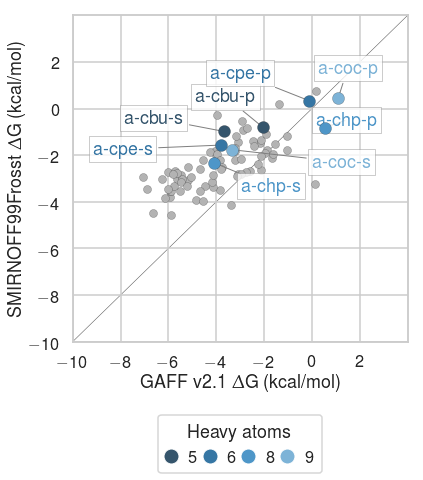

In [411]:
scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
#         highlight=["a-cbu-p", "a-cbu-s",
#                    "a-cpe-p", "a-cpe-s",
#                    "a-chp-p", "a-chp-s",
#                    "a-coc-p", "a-coc-s"],
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "a")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-alpha-alcohols-by-orientation"
)

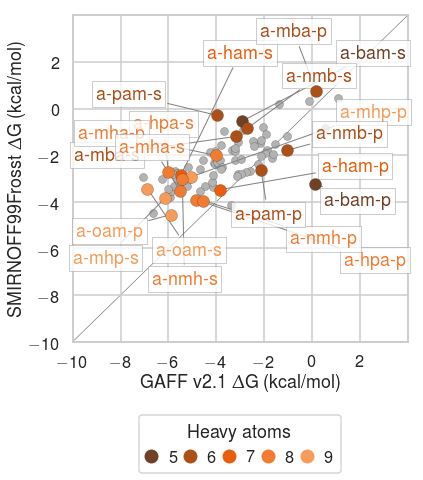

In [412]:
df = smirnoff.merge(bg2bg2, on=["System", "Type"], suffixes=("_smirnoff",
                                                         "_bg2bg2_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]


scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "a")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-alpha-ammonium-by-orientation"
)

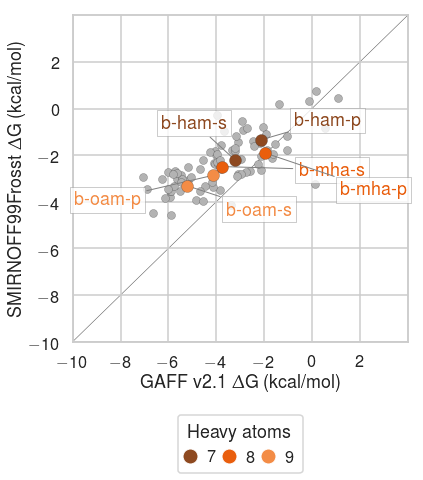

In [413]:
scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "b")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-beta-ammonium-by-orientation"
)

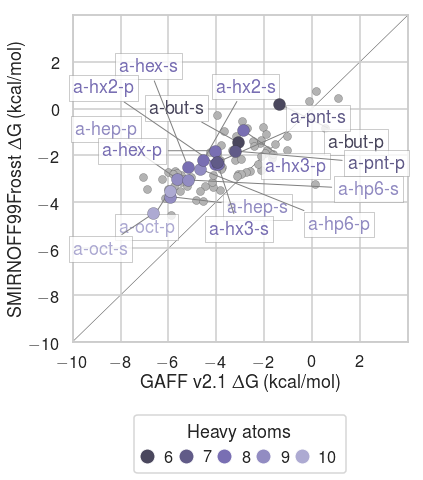

In [414]:
scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "a")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-alpha-carboxylates-by-orientation"
)

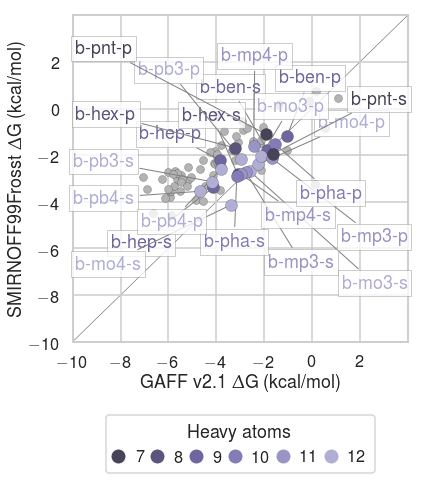

In [415]:
scatter_with_highlight(df,         
        x="Delta G_bg2bg2_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bg2bg2_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "b")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dG-highlight-beta-carboxylates-by-orientation"
)

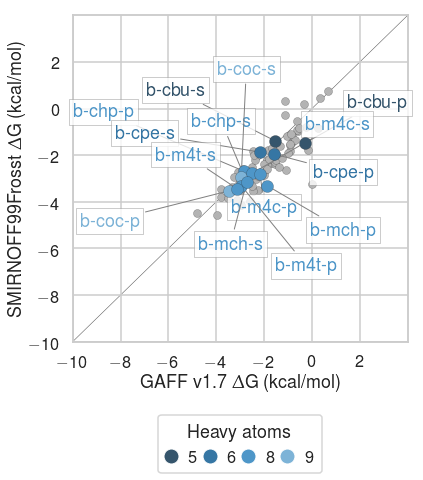

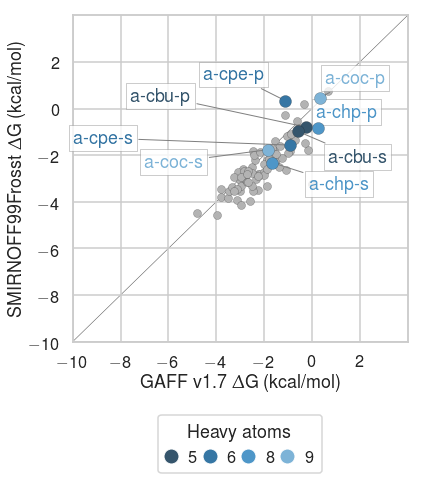

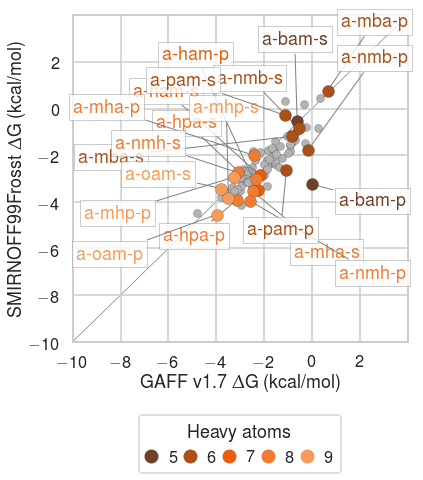

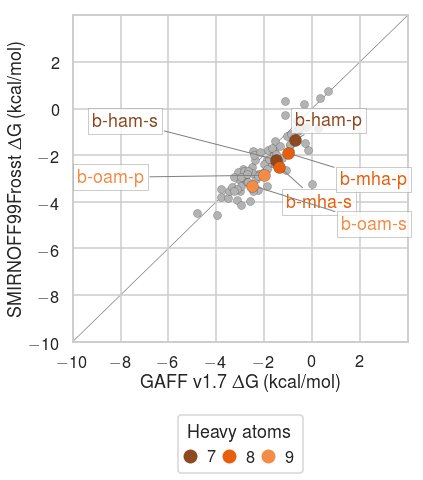

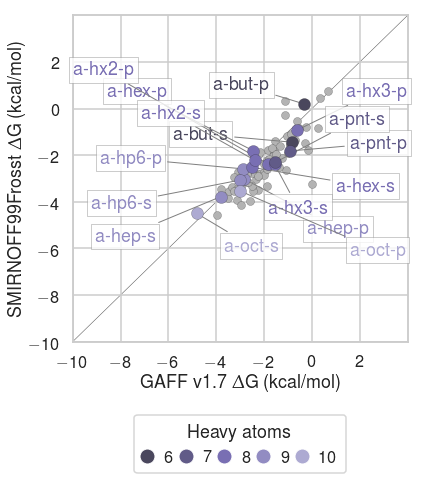

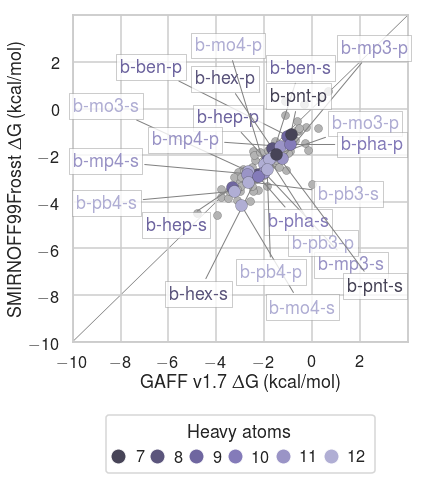

In [416]:
df = smirnoff.merge(bgbg, on=["System", "Type"], suffixes=("_smirnoff",
                                                         "_bgbg_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]


scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "b")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-beta-alcohols-by-orientation"
)

scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "cyclic_alcohols") & (df.Cyclodextrin == "a")].System),
        palette="Blues_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-alpha-alcohols-by-orientation"
)

scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "a")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-alpha-ammonium-by-orientation"
)

scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_ammoniums") & (df.Cyclodextrin == "b")].System),
        palette="Oranges_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-beta-ammonium-by-orientation"
)

scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "a")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-alpha-carboxylates-by-orientation"
)

scatter_with_highlight(df,         
        x="Delta G_bgbg_tip3p",
        y="Delta G_smirnoff",
        xerr="G_SEM_bgbg_tip3p",
        yerr="G_SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$G (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$G (kcal/mol)",
        highlight=list(df[(df.Type == "aliphatic_carboxylates") & (df.Cyclodextrin == "b")].System),
        palette="Purples_d",
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dG-highlight-beta-carboxylates-by-orientation"
)

# Dot plot

In [332]:
from constants import colors
import matplotlib.lines as mlines

def line_with_arrow(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], alpha=0, zorder=-1)
    ax.add_line(l)
    if abs(p2[0] - p1[0]) > 0.2:
        l.axes.annotate('',
            xytext=(p1[0], p1[1]),
            xy=(p2[0], p2[1]),
            arrowprops=dict(arrowstyle="simple", lw=3, color="0.8", shrinkB=5),
            size=25,
            zorder=0,
        )
    return l


def dot_plot(df, xlabel, vertical_scaling=1.5, annotation=False, name=None, fixed=False):
    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6 * vertical_scaling))
    ax.scatter(df.P, df.index, s=150, edgecolor="k", c=df.Color)
    ax.scatter(df.S, df.index, s=150, edgecolor="k", alpha = 1, c=df.Color)

    for i, p1, p2 in zip(df.index, df.S, df.P):
        l = line_with_arrow([p1, i], [p2, i])

        if annotation:
            if (p2 < p1):
                position = p2 - 0.4
            else:
                position = p2 + 0.4
            t = plt.text(position, i, "P", horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'black'})

        
    ax.set_yticks(df.index)
    ax.set_yticklabels(df.System)
    ax.set_xlabel(xlabel)
    ax.set_xlim(-8, 2)
    ax.grid(linestyle="--", alpha=0.5)
    if fixed:
        new_ticks = []
        for label in ax.get_yticklabels():
            new_ticks.append(r"\texttt{{ {} }}".format(label))
        ax.set_yticklabels(new_ticks)

    
    if name:
        fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
        fig.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")
        
def separate_binding_affinities(df, x, x_type, threshold=None):
    
        highlights = pd.DataFrame()
        for index, sys in enumerate(df["Short"].unique()):

            difference = df[df["Short"] == sys][x].iloc[0] - df[df["Short"] == sys][x].iloc[1]
            if threshold:
                if abs(difference) > threshold:

                    selection = {}
                    selection["System"] = sys
                    selection["Difference"] = difference
                    selection["P"] = df[df["Short"] == sys][x].iloc[0]
                    selection["S"] = df[df["Short"] == sys][x].iloc[1]
                    selection["Color"] = colors[df[df["Short"] == sys][x_type].iloc[0]]
                    highlights = highlights.append(selection,
                                      ignore_index = True)
                else:
                    pass
            else:
                selection = {}
                selection["System"] = sys
                selection["Difference"] = difference
                selection["P"] = df[df["Short"] == sys][x].iloc[0]
                selection["S"] = df[df["Short"] == sys][x].iloc[1]
                selection["Color"] = colors[df[df["Short"] == sys][x_type].iloc[0]]

                highlights = highlights.append(selection,
                                  ignore_index = True)

        return highlights

In [333]:
def dot_labeled_circle(df, xlabel, vertical_scaling=1.5, name=None):
    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6 * vertical_scaling))
    ax.scatter(df.P, df.index, s=400, edgecolor="k", alpha = 0.8, c=df.Color)
    ax.scatter(df.S, df.index, s=400, edgecolor="k", alpha = 0.8, c=df.Color)

    for i, p1, p2 in zip(df.index, df.S, df.P):
        l = line_with_arrow([p1, i], [p2, i])

        t = plt.text(p2, i, "P", horizontalalignment='center', 
             verticalalignment='center', fontdict={'color':'black'})
        t = plt.text(p1, i, "S", horizontalalignment='center', 
             verticalalignment='center', fontdict={'color':'black'})


        
    ax.set_yticks(df.index)
    ax.set_yticklabels(df.System)
    ax.set_xlabel(xlabel)
    ax.set_xlim(-8, 2)
    ax.grid(linestyle="--", alpha=0.5)
    
    if name:
        fig.savefig(f"figures/{name}.pdf", bbox_inches="tight")
        fig.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")

In [334]:
df = smirnoff.merge(bgbg, on=["System"], suffixes=("_smirnoff",
                                                         "_bgbg_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

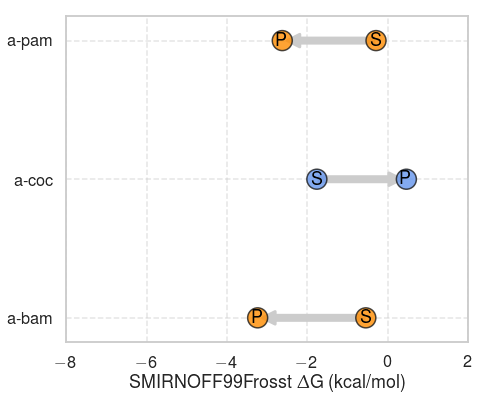

In [335]:
highlights = separate_binding_affinities(
    df,
    x="Delta G_smirnoff",
    x_type="Type_smirnoff",
    threshold=2)

# highlights.sort_values("Difference", inplace=True, ascending=False)
highlights.reset_index(inplace=True)
dot_labeled_circle(
    highlights,
    xlabel="SMIRNOFF99Frosst $\Delta$G (kcal/mol)", 
    vertical_scaling=1.0, 
    name="SMIRNOFF99Frosst-dG-by-orientation-highlight"
)



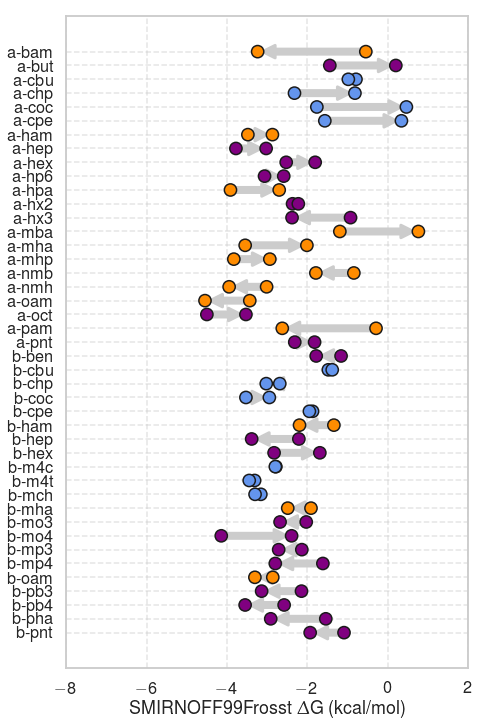

In [336]:
highlights = separate_binding_affinities(
    df,
    x="Delta G_smirnoff",
    x_type="Type_smirnoff",
    threshold=None)

# highlights["Abs"] = abs(highlights["P"] - highlights["S"])
# highlights.sort_values("Abs", inplace=True, ascending=True)
# highlights.reset_index(inplace=True)
highlights.sort_values("System", inplace=True, ascending=False)
highlights.reset_index(inplace=True)

dot_plot(
    highlights,
    xlabel="SMIRNOFF99Frosst $\Delta$G (kcal/mol)", 
    vertical_scaling=2, 
    name="SMIRNOFF99Frosst-dG-by-orientation-all",
    fixed=False
)



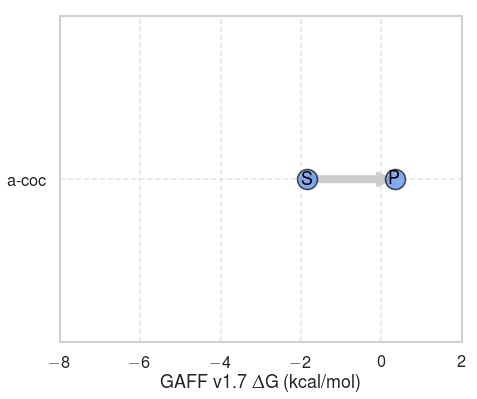

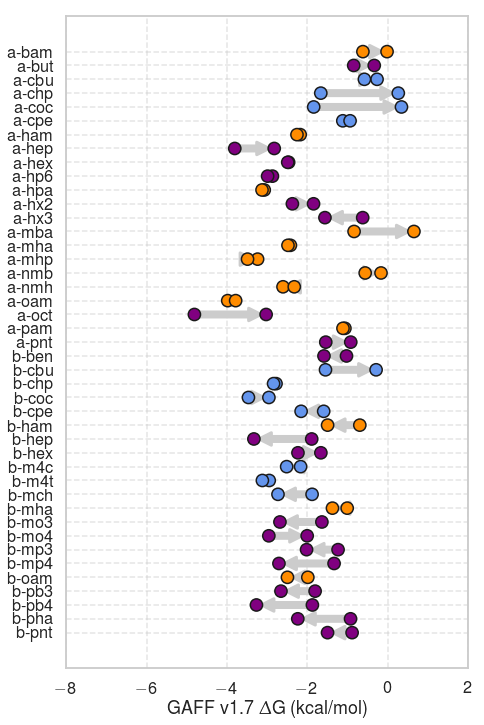

In [337]:
highlights = separate_binding_affinities(
    df,
    x="Delta G_bgbg_tip3p",
    x_type="Type_bgbg_tip3p",
    threshold=2)

# highlights.sort_values("Difference", inplace=True, ascending=False)
# highlights.reset_index(inplace=True)

highlights.sort_values("System", inplace=True, ascending=False)
highlights.reset_index(inplace=True)


dot_labeled_circle(
    highlights,
    xlabel="GAFF v1.7 $\Delta$G (kcal/mol)", 
    vertical_scaling=1.0, 
    name="GAFF-v1.7-dG-by-orientation-highlight"
)


highlights = separate_binding_affinities(
    df,
    x="Delta G_bgbg_tip3p",
    x_type="Type_bgbg_tip3p",
    threshold=None)

# highlights["Abs"] = abs(highlights["P"] - highlights["S"])
# highlights.sort_values("Abs", inplace=True, ascending=True)
# highlights.reset_index(inplace=True)

highlights.sort_values("System", inplace=True, ascending=False)
highlights.reset_index(inplace=True)

dot_plot(
    highlights,
    xlabel="GAFF v1.7 $\Delta$G (kcal/mol)", 
    vertical_scaling=2, 
    name="GAFF-v1.7-dG-by-orientation-all"
)

In [338]:
df = smirnoff.merge(bg2bg2, on=["System"], suffixes=("_smirnoff",
                                                         "_bg2bg2_tip3p"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

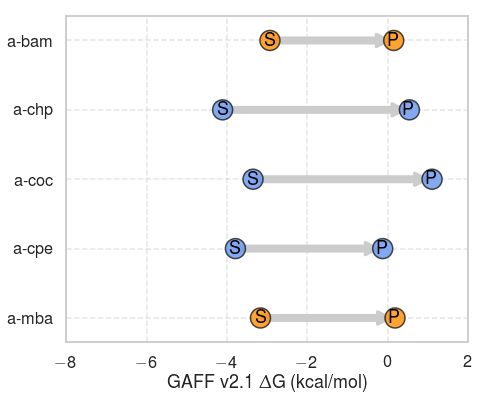

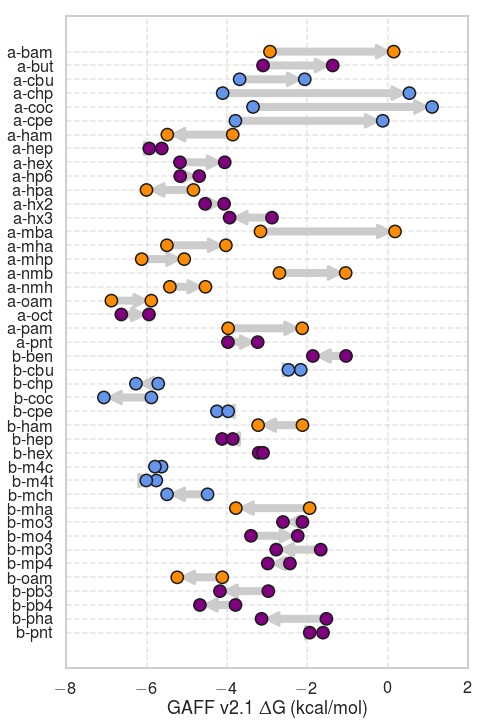

In [339]:
highlights = separate_binding_affinities(
    df,
    x="Delta G_bg2bg2_tip3p",
    x_type="Type_bg2bg2_tip3p",
    threshold=2)

# highlights.sort_values("Difference", inplace=True, ascending=False)
# highlights.reset_index(inplace=True)

highlights.sort_values("System", inplace=True, ascending=False)
highlights.reset_index(inplace=True)


dot_labeled_circle(
    highlights,
    xlabel="GAFF v2.1 $\Delta$G (kcal/mol)", 
    vertical_scaling=1.0, 
    name="GAFF-v2.1-dG-by-orientation-highlight"
)



highlights = separate_binding_affinities(
    df,
    x="Delta G_bg2bg2_tip3p",
    x_type="Type_bg2bg2_tip3p",
    threshold=None)

# highlights["Abs"] = abs(highlights["P"] - highlights["S"])
# highlights.sort_values("Abs", inplace=True, ascending=True)
# highlights.reset_index(inplace=True)

highlights.sort_values("System", inplace=True, ascending=False)
highlights.reset_index(inplace=True)


dot_plot(
    highlights,
    xlabel="GAFF v2.1 $\Delta$G (kcal/mol)", 
    vertical_scaling=2, 
    name="GAFF-v2.1-dG-by-orientation-all"
)


In [340]:
df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                         "_experimental"))
df["Cyclodextrin"] = df["System"].str.split("-").str[0] 
df["Guest"] = df["System"].str.split("-").str[1]
df["Short"] = df["Cyclodextrin"] + "-" + df["Guest"]

In [341]:
df[df.Type == "aliphatic_ammoniums"]

,Unnamed: 0_smirnoff,Delta G_smirnoff,Delta H_smirnoff,G_SEM_smirnoff,H_SEM_smirnoff,System,Type,Unnamed: 0_experimental,Delta G_experimental,G_SEM_experimental,Delta H_experimental,H_SEM_experimental,Cyclodextrin,Guest,Short
0,0,-3.246889,-0.428111,0.444726,0.280564,a-bam,aliphatic_ammoniums,0,-1.58,0.02,-2.17,0.05,a,bam,a-bam
7,7,-3.432186,-4.018099,0.296499,0.327923,a-ham,aliphatic_ammoniums,4,-3.53,0.00,-4.19,0.02,a,ham,a-ham
11,11,-3.024247,-4.473578,0.315715,0.359047,a-hpa,aliphatic_ammoniums,7,-4.14,0.00,-4.66,0.02,a,hpa,a-hpa
12,12,-1.217938,-0.947593,0.301258,0.406178,a-mba,aliphatic_ammoniums,2,-1.76,0.02,-2.68,0.07,a,mba,a-mba
14,14,-3.976666,-4.892071,0.290070,0.230269,a-mhp,aliphatic_ammoniums,8,-4.17,0.00,-4.74,0.02,a,mhp,a-mhp
15,15,-3.601323,-3.309833,0.286156,0.503689,a-mha,aliphatic_ammoniums,6,-3.60,0.00,-4.28,0.02,a,mha,a-mha
16,16,-4.154133,-4.201387,0.591616,0.479672,a-nmh,aliphatic_ammoniums,5,-3.52,0.01,-4.20,0.08,a,nmh,a-nmh
17,17,-1.954156,-1.104734,0.416370,0.275849,a-nmb,aliphatic_ammoniums,1,-1.69,0.02,-2.57,0.06,a,nmb,a-nmb
19,19,-4.679938,-4.927962,0.492158,0.280708,a-oam,aliphatic_ammoniums,9,-4.61,0.01,-5.46,0.03,a,oam,a-oam
21,21,-2.661854,-1.716872,0.771404,0.606729,a-pam,aliphatic_ammoniums,3,-2.72,0.00,-3.28,0.02,a,pam,a-pam
